In [3]:
import torch

x = torch.ones(1, requires_grad=True)
print(x.grad)

None


In [4]:
x = torch.ones(1, requires_grad=True)
y = x + 2
z = y*y*2

z.backward() # automatically calculates the gradient
print(x.grad)

tensor([12.])


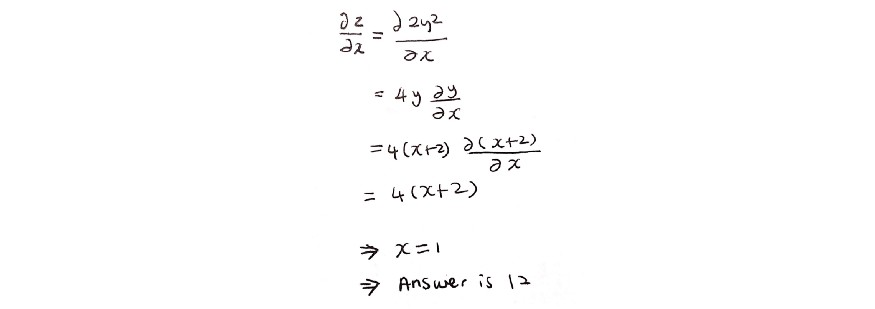

In [5]:
class Perceptron(torch.nn.Module):
    def __inti__(self):
        super(Percepton, self).__init__()
        self.fc = nn.Linear(1, 1)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        output = self.fc(x)
        output = self.relu(x)
        return output

In [11]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size,  1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

When you have more than two hidden layers, the model is also called the **deep/multilayere feedforward model** or **multilayer perceptron model (MLP)**.

In [12]:
# Creating random data points

from sklearn.datasets import make_blobs
import numpy as np

def blob_label(y, label, loc):
    target = np.copy(y)
    for l in loc:
        target[y == 1] = label
    return target

x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1, 2, 3]))

x_test, y_test = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1, 2, 3]))

In [13]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.5828957557678223


In [15]:
model.train()
epochs = 20

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred.squeeze(), y_train)
    
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.7684575915336609
Epoch 1: train loss: 0.7547118067741394
Epoch 2: train loss: 0.7416671514511108
Epoch 3: train loss: 0.7292412519454956
Epoch 4: train loss: 0.7173119783401489
Epoch 5: train loss: 0.7058874368667603
Epoch 6: train loss: 0.6949091553688049
Epoch 7: train loss: 0.6843011379241943
Epoch 8: train loss: 0.6740638613700867
Epoch 9: train loss: 0.6641572117805481
Epoch 10: train loss: 0.6550294160842896
Epoch 11: train loss: 0.6459881663322449
Epoch 12: train loss: 0.6372243762016296
Epoch 13: train loss: 0.6287000179290771
Epoch 14: train loss: 0.6206815242767334
Epoch 15: train loss: 0.6132978796958923
Epoch 16: train loss: 0.6061424016952515
Epoch 17: train loss: 0.5991929173469543
Epoch 18: train loss: 0.5924286842346191
Epoch 19: train loss: 0.5858291983604431


In [17]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test)
print("Test loss after training:", after_train.item())

Test loss after training: 0.5937784314155579
